In [36]:
%matplotlib inline

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy.coordinates import BarycentricTrueEcliptic
from astropy import units as u
from astropy.coordinates import ICRS
from astroquery.mast import Catalogs

import lightkurve as lk

In [31]:
cvz = BarycentricTrueEcliptic(lon=0*u.deg, lat=-90*u.deg)
coords = cvz.transform_to(ICRS)

In [46]:
catalog_data = Catalogs.query_criteria(coordinates="{0} {1}".format(coords.ra.value, coords.dec.value),
                                       radius=.1, catalog="Tic", objType="STAR")
df = catalog_data.to_pandas()

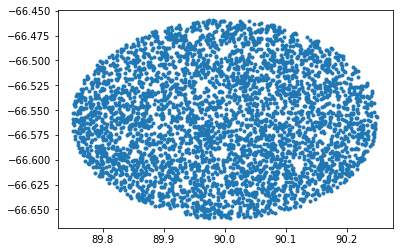

In [48]:
plt.plot(df.ra, df.dec, ".")

In [63]:
ticid = df.ID.values[4]
print(ticid)
starname = "TIC {}".format(ticid)
lcf = lk.search_lightcurvefile(starname).download()

31604329


No data found for target "TIC 31604329".
/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:131: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


In [64]:
lc = lcf.PDCSAP_FLUX
lc.scatter(alpha=.5, s=.5);

AttributeError: 'NoneType' object has no attribute 'PDCSAP_FLUX'